#Group 14 Project II
##Below is the submission for: Myer Khan, Anika Vemuri, Henrietta Namale, Maria Ninan, & Neha Sonthi

*The lines below will include:*

1. Code representing our IF Model
2. Knowledge about the LIF model and disparities from biological neurons
3. Most difficult part of this homework
4. Time taken to complete homework

**Description of I&F Model:**
It represents a simplified way to simulate neuronal spiking behavior, implying that membrane potential increases linearly and injected current does not decay over time. 

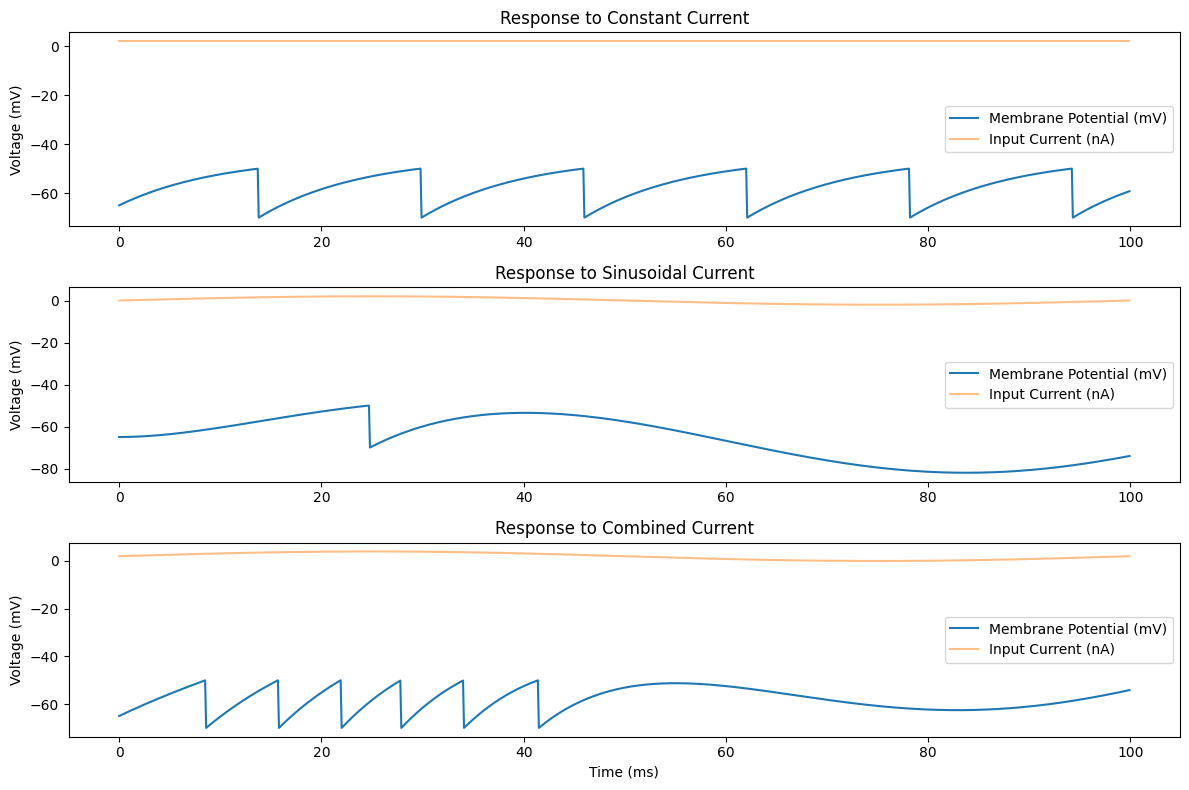

Spike analysis for constant current: {'spike_count': 6, 'mean_isi': np.float64(16.1), 'std_isi': np.float64(3.552713678800501e-15)}
Spike analysis for sinusoidal current: {'spike_count': 1, 'mean_isi': None, 'std_isi': None}
Spike analysis for combined current: {'spike_count': 6, 'mean_isi': np.float64(6.580000000000001), 'std_isi': np.float64(0.6013318551349158)}


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define simulation parameters
dt = 0.1  # Time step (ms)
t = np.arange(0, 100, dt)  # Simulation time (ms)

# Define neuron parameters
V_rest = -65  # Resting membrane potential (mV)
V_th = -50  # Threshold potential (mV)
V_reset = -70  # Reset potential (mV)
R_m = 10  # Membrane resistance (MΩ)
tau_m = 10  # Membrane time constant (ms)

# Define input currents (can be modified to explore different patterns)
def constant_current(I):
    return np.ones(len(t)) * I

def sinusoidal_current(I_amp, freq):
    return I_amp * np.sin(2 * np.pi * freq * t / 1000)

# Function to simulate IF neuron
def simulate_IF(I):
    V = np.zeros(len(t))  # Membrane potential over time
    V[0] = V_rest
    spikes = []  # Spike times

    for i in range(1, len(t)):
        # Update membrane potential using Euler's method
        dV = (-(V[i-1] - V_rest) + R_m * I[i]) / tau_m
        V[i] = V[i-1] + dV * dt

        # Check for threshold crossing
        if V[i] >= V_th:
            V[i] = V_reset  # Reset potential
            spikes.append(t[i])  # Record spike time

    return V, spikes

# Visualize the response to different currents
plt.figure(figsize=(12, 8))

# Constant input current
I_const = constant_current(2)  # 2 nA current
V_const, spikes_const = simulate_IF(I_const)
plt.subplot(3, 1, 1)
plt.plot(t, V_const, label="Membrane Potential (mV)")
plt.plot(t, I_const, label="Input Current (nA)", alpha=0.5)
plt.title("Response to Constant Current")
plt.ylabel("Voltage (mV)")
plt.legend()

# Sinusoidal input current
I_sin = sinusoidal_current(2, 10)  # Amplitude 2 nA, frequency 10 Hz
V_sin, spikes_sin = simulate_IF(I_sin)
plt.subplot(3, 1, 2)
plt.plot(t, V_sin, label="Membrane Potential (mV)")
plt.plot(t, I_sin, label="Input Current (nA)", alpha=0.5)
plt.title("Response to Sinusoidal Current")
plt.ylabel("Voltage (mV)")
plt.legend()

# Combined input current
I_combined = I_const + I_sin
V_combined, spikes_combined = simulate_IF(I_combined)
plt.subplot(3, 1, 3)
plt.plot(t, V_combined, label="Membrane Potential (mV)")
plt.plot(t, I_combined, label="Input Current (nA)", alpha=0.5)
plt.title("Response to Combined Current")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.legend()

plt.tight_layout()
plt.show()

# Spike analysis
def analyze_spikes(spikes):
    isi = np.diff(spikes)  # Interspike intervals
    return {
        "spike_count": len(spikes),
        "mean_isi": np.mean(isi) if len(isi) > 0 else None,
        "std_isi": np.std(isi) if len(isi) > 0 else None
    }

print("Spike analysis for constant current:", analyze_spikes(spikes_const))
print("Spike analysis for sinusoidal current:", analyze_spikes(spikes_sin))
print("Spike analysis for combined current:", analyze_spikes(spikes_combined))

2. This model does not include leaky ion channels that are important in real biological neurons. As a result, this model shows a hard drop back to resting potential instead of a gradual decline that should be present because of the leaky channels. This model does show how positive currents bring it closer to threshold which aligns with a real biologcal neuron. In order to account for how an action potential is generated in the AIS in a biological neuron, this model includes a spike generator that responds once voltage reaches threshold. 

3. The most challenging aspect of this homework was writing the correct prompts to get the code that we needed from chat GPT.

4. This homework took about 45 minutes to complete. 